**Introduction**

* The goal of this project is to predict whether a student will be placed through campus recruitment, using academic, personal, and professional background data.

* This is a group project, developed collaboratively, where we applied classical machine learning techniques including Logistic Regression, Decision Tree, Random Forest, SVM, KNN, and XGBoost. We also analyzed how features relate to placement outcomes.

**Approach**

* We started by exploring the data, checking for missing values, and grouping features into binary, categorical, and numerical types. After encoding the relevant features, we split the data into training and test sets. Scaling was applied after the split to prevent data leakage.

* Each model was trained and evaluated using accuracy, precision, recall, and F1-score. We then compared the results to identify the best-performing model and analyzed which features contributed most to placement predictions.

## 1. Dataset Selection

* The dataset used in this project was sourced from Kaggle: Placement dataset.

* It contains records of student profiles from a university placement cell, including academic, demographic, and professional background information for each student, with a clear binary target variable indicating whether the student was placed or not placed.

* This dataset is appropriate for the assignment, as it presents a well-defined classification problem: predicting placement status based on available features. The target variable is labeled as status with two classes: `Placed` and `Not Placed`.

* The dataset includes variables such as:
    * `ssc_p`, `hsc_p`, and `degree_p` represent the student’s percentage scores at different academic levels: secondary school certificate, high school certificate, and undergraduate degree, respectively.
    * `ssc_b` and `hsc_b` indicate the type of education board (Central or Other). 
    * `hsc_s` shows the stream of study in high school (Science, Commerce, or Arts).
    * `degree_t` shows the type of undergraduate degree pursued (Science & Technology, Commerce & Management, or Others).
    * `workex` is a binary feature that shows whether the student has any prior work experience.
    * `etest_p` represents the student’s percentage score in an employability test.
    * `mba_p` represents the student’s percentage score in their MBA program.
    * `gender`, `stream`, `specialisation` are categorical features related to the student’s background.
    * `salary` is the final CTC offered to students who were placed. It is missing for those who did not receive an offer.

* In total, the dataset contains approximately 215 records, with a fairly balanced distribution across the target classes. While the size is relatively small, it is sufficient for experimenting with classical machine learning models such as Logistic Regression, Decision Tree, and Random Forest.

## 2. Data Preprocessing

### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score


### Load dataset

In [2]:
df = pd.read_csv(r'C:\Users\mohiv\Downloads\Placement.csv')
print('done')

done


### Comprehensive exploratory data analysis (EDA)

In [3]:
print(df.head())

   sl_no  gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1       0  67.00   Others  91.00   Others  Commerce     58.00   
1      2       0  79.33  Central  78.33   Others   Science     77.48   
2      3       0  65.00  Central  68.00  Central      Arts     64.00   
3      4       0  56.00  Central  52.00  Central   Science     52.00   
4      5       0  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB
None


In [5]:
print(df.describe())

            sl_no      gender       ssc_p       hsc_p    degree_p     etest_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   108.000000    0.353488   67.303395   66.333163   66.370186   72.100558   
std     62.209324    0.479168   10.827205   10.897509    7.358743   13.275956   
min      1.000000    0.000000   40.890000   37.000000   50.000000   50.000000   
25%     54.500000    0.000000   60.600000   60.900000   61.000000   60.000000   
50%    108.000000    0.000000   67.000000   65.000000   66.000000   71.000000   
75%    161.500000    1.000000   75.700000   73.000000   72.000000   83.500000   
max    215.000000    1.000000   89.400000   97.700000   91.000000   98.000000   

            mba_p         salary  
count  215.000000     148.000000  
mean    62.278186  288655.405405  
std      5.833385   93457.452420  
min     51.210000  200000.000000  
25%     57.945000  240000.000000  
50%     62.000000  265000.000000  
75%     66.255000  300000

### Check missing values

In [6]:
print(df.isnull().sum())

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


### Check status values when salary is missing or zero

In [7]:
print(df[df['salary'].isnull()]['status'].value_counts())
print(df[df['salary'] == 0]['status'].value_counts())

status
Not Placed    67
Name: count, dtype: int64
Series([], Name: count, dtype: int64)


**Observations from missing values**

* Based on the results, `salary` is only assigned to students who got placed (status = **Placed**). 
* All students without salary info has status = **Not Placed**. 
* I will include this column in the analysis, but I won't add that since this `salary` perfectly reveals the target, that caused data leakage. 

### Check duplicated rows

In [8]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [sl_no, gender, ssc_p, ssc_b, hsc_p, hsc_b, hsc_s, degree_p, degree_t, workex, etest_p, specialisation, mba_p, status, salary]
Index: []


**Observations from EDA**

* The dataset contains a total of 15 columns:
    * 6 columns as float64 (decimal numbers)
    * 2 columns as int64 (whole numbers)
    * 7 columns as object type (text or categories)

* The target column for this project is `status`, which shows whether a student was placed or not.

* From the summary statistics:
    * The `sl_no` column is a sequential ID, so I will drop this during preprocessing.

    * Assuming `gender` is encoded as Male = 0 and Female = 1, the average is around 0.35, which suggests the dataset presents more male students than female. I will explore whether this imbalance affects the model performance or the placement outcome.

    * The academic related columns (`ssc_p`, `hsc_p`, `degree_p`, `etest_p`, `mba_p`) are fairly normally distributed, with mean values falling between 60% and 70%.

    * The `salary` column shows a high standard deviation (~93,000), meaning there is a lot of variation in the salaries.

* Regarding missing values, only the `salary` column has 67 missing entries. Since I have only conducted basic analysis so far, I will further explore its correlation with the target variable (status), as well as its distribution and skewness, before deciding how to handle the missing data.

* There are no duplicated rows, so I don't need to remove any repeated records.

### Drop unnecessary column

In [9]:
df = df.drop('sl_no', axis=1)
print(df.columns)

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')


### Check unique values

In [10]:
target_variable = 'status'
print(f"Unique values: {df[target_variable].unique()}")

Unique values: ['Placed' 'Not Placed']


In [11]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    unique_count = df[col].nunique()
    print(f"Count of unique values in '{col}': {unique_count}")
    print(f"Unique values: {df[col].unique()}")
    print()

Count of unique values in 'gender': 2
Unique values: [0 1]

Count of unique values in 'ssc_p': 103
Unique values: [67.   79.33 65.   56.   85.8  55.   46.   82.   73.   58.   69.6  47.
 77.   62.   63.   60.   79.   69.8  77.4  76.5  52.58 71.   76.76 64.
 61.   87.   69.   51.   81.   78.   74.   49.   76.   70.89 50.   75.2
 54.4  40.89 80.   60.4  68.   52.6  84.2  86.5  54.   83.   80.92 69.7
 75.   84.86 64.6  56.6  59.   66.5  84.   81.7  70.   83.84 59.6  66.
 85.   52.   60.23 70.5  45.   61.08 69.5  73.96 68.2  60.8  72.   80.4
 76.7  74.9  77.44 77.67 89.4  44.   75.4  53.   51.57 55.6  74.2  67.16
 63.3  67.9  48.   59.96 63.4  73.24 77.8  56.28 88.   78.5  61.8  65.2
 83.96 54.2  55.68 41.   83.33 43.   80.6 ]

Count of unique values in 'hsc_p': 97
Unique values: [91.   78.33 68.   52.   73.6  49.8  49.2  64.   79.   70.   61.   68.4
 55.   87.   47.   75.   66.2  67.   66.   65.   76.   60.8  60.   97.7
 54.6  76.5  73.5  53.   81.   51.   78.   44.   58.   77.   63.16 39.

In [12]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols = [col for col in categorical_cols if col != target_variable] 

for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"Count of unique values in '{col}': {unique_count}")
    print(f"Unique values: {df[col].unique()}")
    print()

Count of unique values in 'ssc_b': 2
Unique values: ['Others' 'Central']

Count of unique values in 'hsc_b': 2
Unique values: ['Others' 'Central']

Count of unique values in 'hsc_s': 3
Unique values: ['Commerce' 'Science' 'Arts']

Count of unique values in 'degree_t': 3
Unique values: ['Sci&Tech' 'Comm&Mgmt' 'Others']

Count of unique values in 'workex': 2
Unique values: ['No' 'Yes']

Count of unique values in 'specialisation': 2
Unique values: ['Mkt&HR' 'Mkt&Fin']



**Observations from Unique Values Check**

* All object-type columns have clean and consistent values with no trailing or leading whitespaces detected.

* ssc_b and hsc_b each contain 2 unique values: "Central" and "Others"

* workex is binary, with values "Yes"/"No"

* hsc_s has 3 categories: "Commerce", "Science", and "Arts"

* degree_t also has 3 values: "Sci&Tech", "Comm&Mgmt", and "Others"

* I will further analyze these, and encode accrodingly. 

## 3. Visualization

### Group columns: binary, multi-cat, numeric

In [13]:
binary_numeric_cols = [col for col in numerical_cols if df[col].nunique() == 2]
numerical_cols = [col for col in numerical_cols if col not in binary_numeric_cols]

print("Binary Columns:")
print(binary_numeric_cols)
print()
print("Numerical Columns:")
print(numerical_cols)

Binary Columns:
['gender']

Numerical Columns:
['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [14]:
binary_categorical_cols = [col for col in categorical_cols if df[col].nunique() == 2]
multi_categorical_cols = [col for col in categorical_cols if col not in binary_categorical_cols]

print("Binary Categorical Columns:")
print(binary_categorical_cols)
print()
print("Multi-Class Categorical Columns:")
print(multi_categorical_cols)

Binary Categorical Columns:
['ssc_b', 'hsc_b', 'workex', 'specialisation']

Multi-Class Categorical Columns:
['hsc_s', 'degree_t']


### Combine binary + multi-class categorical columns

In [15]:
categorical_cols = ['gender', 'ssc_b', 'hsc_b', 'workex', 'specialisation', 'hsc_s', 'degree_t']

### Plot distributions on numerical columns


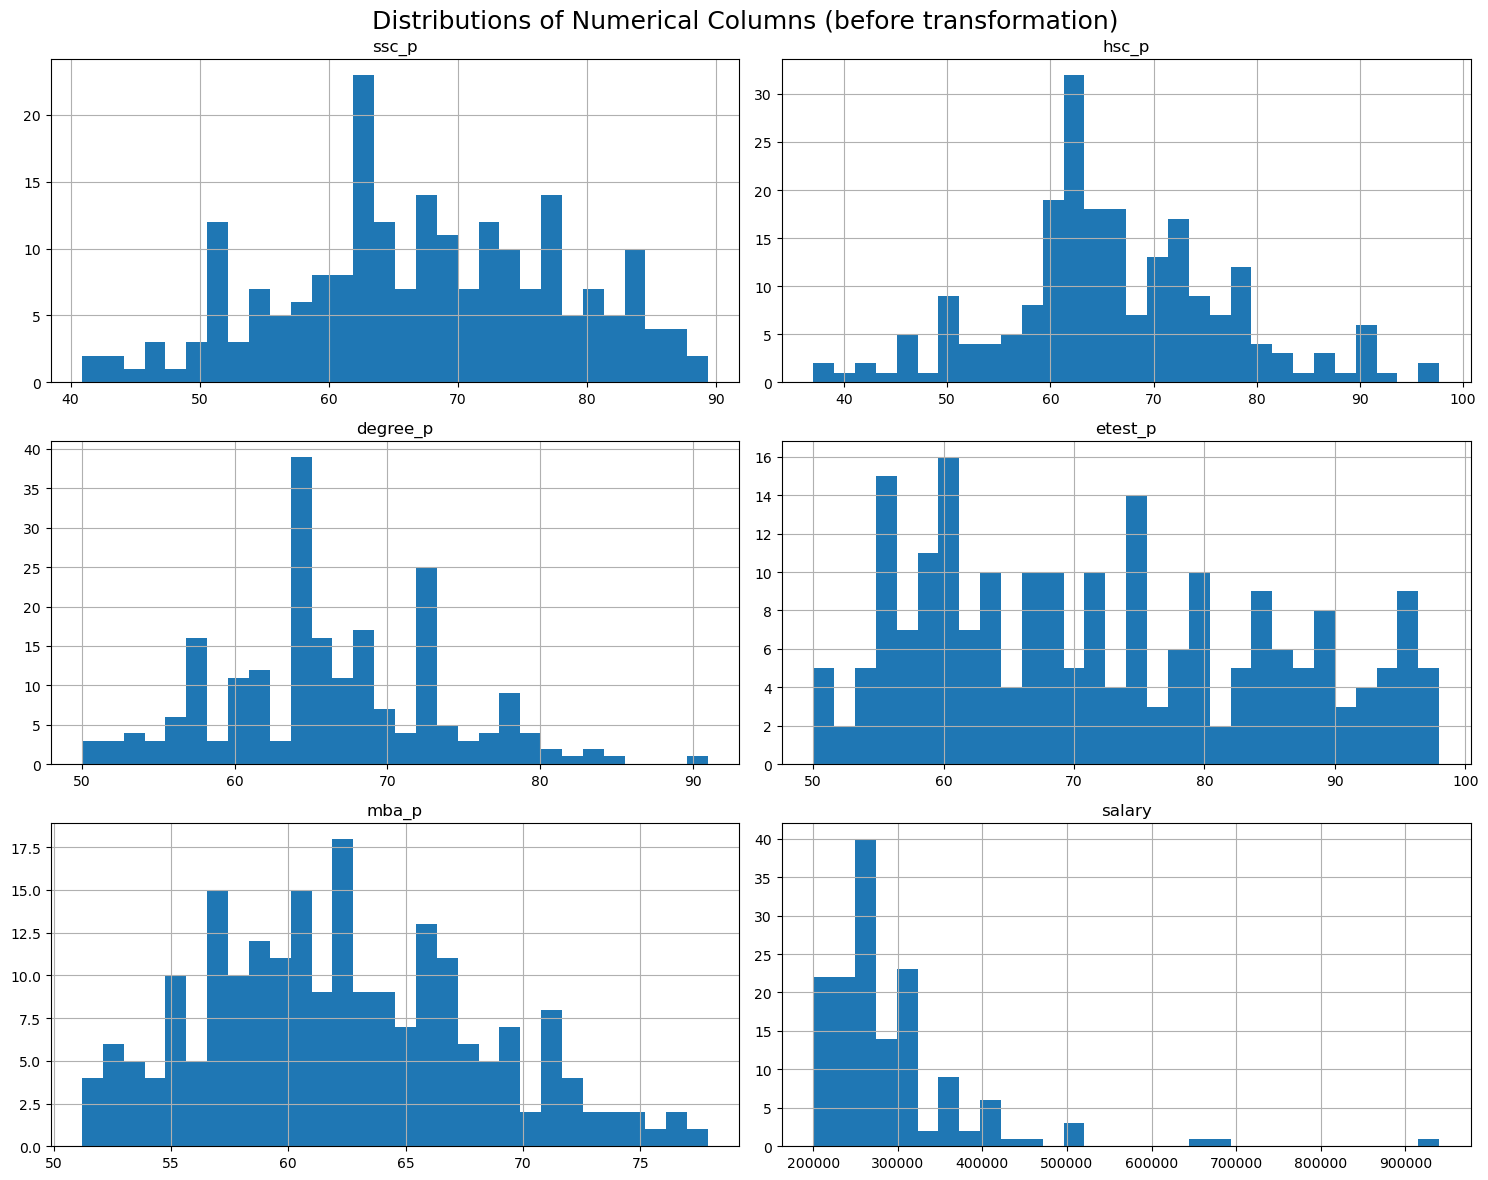

In [16]:
df[numerical_cols].hist(bins=30, figsize=(15,12))
plt.suptitle("Distributions of Numerical Columns (before transformation)", fontsize=18)
plt.tight_layout()
plt.show()

**Observations from Numerical Distributions**

* Columns like `ssc_p`, `hsc_p`, and `mba_p` appear roughly normally distributed. Most values are between 60% and 70%.
* `degree_p` is also close to normal distribution, but has some higher values near 90.
* `etest_p` is more spread out and doesn’t have a clear peak.
* `salary` is right-skewed, with most values between 200K and 350K. It also has a few high outliers. I’ll handle this during preprocessing. 

Plot 

### Plot countplots for all categorical features

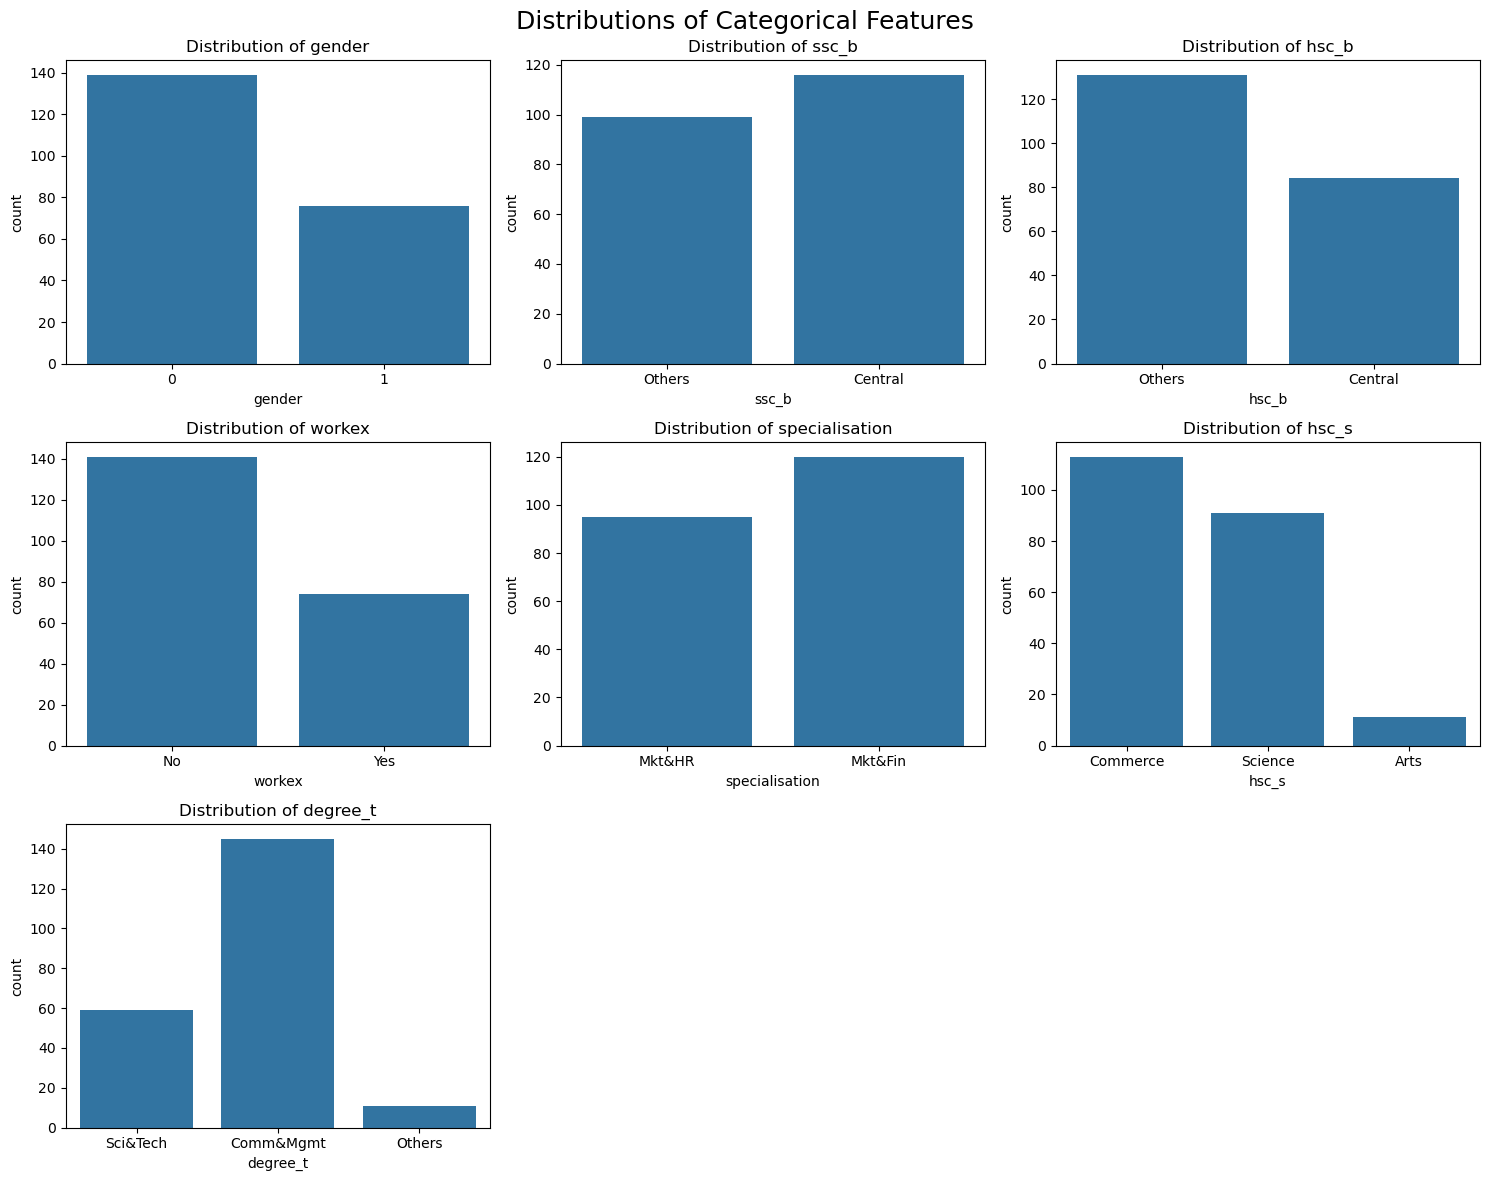

In [17]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, start=1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")

plt.suptitle("Distributions of Categorical Features", fontsize=18)
plt.tight_layout()
plt.show()

**Observations from Overall Categorical Distribution**

* For `gender`, there are more male students than female. 

* More students come from the "Central" board in `ssc_b`, but for `hsc_b`, "Others" is more common.

* For `workex`, more students have no prior work experience than those who do.

* In `specialisation`, "Mkt&Fin" is slightly more common than "Mkt&HR".

* For `hsc_s`, most students are from Commerce and Science streams, with very few from Arts.

* For `degree_t`, the majority of students hold a "Comm&Mgmt" degree, followed by "Sci&Tech". Very few fall into the "Others" category.

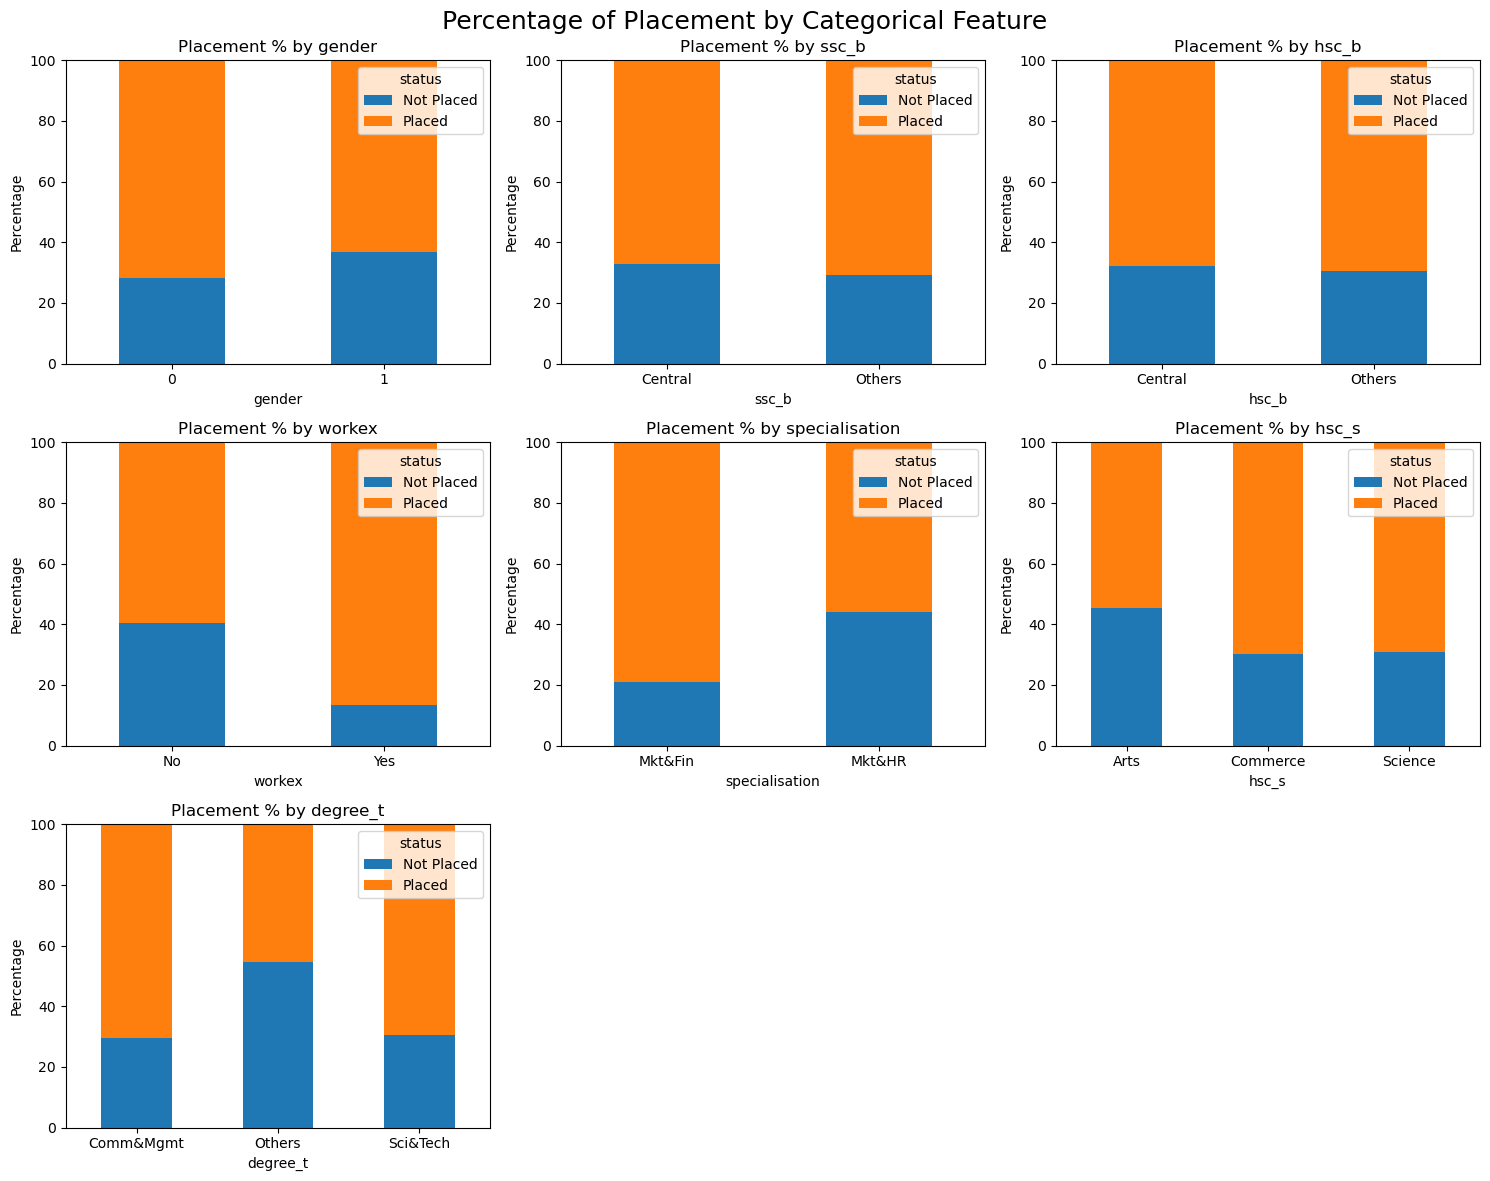

In [18]:
# Set up subplot grid
plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_cols, start=1):
    # Compute % distribution
    cross_tab = pd.crosstab(df[col], df['status'], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True, ax=plt.subplot(3, 3, i))
    
    plt.title(f"Placement % by {col}")
    plt.ylabel("Percentage")
    plt.xlabel(col)
    plt.ylim(0, 100)
    plt.xticks(rotation=0)

plt.suptitle("Percentage of Placement by Categorical Feature", fontsize=18)
plt.tight_layout()
plt.show()

**Observations from Percentage Placement by Categorical Features**

* First plot shows that **male students** have a higher placement rate than female students, as indicated by the taller orange segment for `gender = 0`.

* Based on 2nd and 3rd plots:
    * Students from the **Others** board have a slightly higher placement rate in `ssc_b`.
    * Students from the **Central** board have a slightly better placement rate in `hsc_b`.

* The 4th plot shows that students with **work experience** have a clearly higher placement rate than those without.

* For `specialisation`, students in **Marketing & Finance** have a higher placement rate than those in **Marketing & HR**.

* For `hsc_s`, students from **Commerce** and **Science** streams are placed more often than those from **Arts**.

* Students with **Comm&Mgmt** degrees have the highest placement rate, followed by **Sci&Tech**. In contrast, students in the **Others** degree category have the lowest placement rate.

### Plot class distirbution of target variable

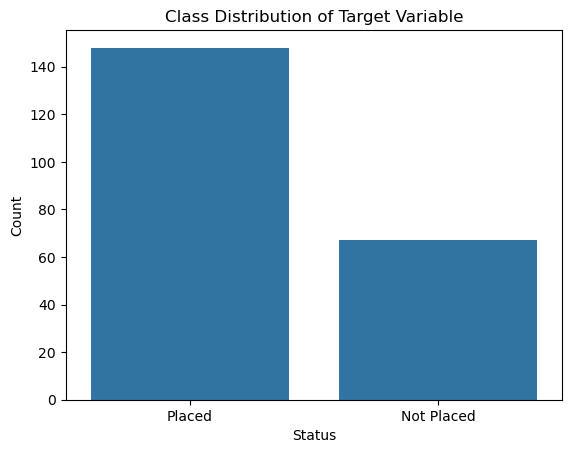

status
Placed        0.69
Not Placed    0.31
Name: proportion, dtype: float64


In [19]:
sns.countplot(x="status", data=df)
plt.title("Class Distribution of Target Variable")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

print(df["status"].value_counts(normalize=True).round(2))

**Observation from Class Distribution of Target Variable**

* The target variable status is moderately imbalanced.

* Out of all students, 69% are labeled as "Placed" and 31% as "Not Placed".

* This imbalance may bias the model toward predicting the majority class. To mitigate this, I will focus on recall and F1-score during evaluation and use confusion matrices to monitor class-wise performance, especially for the minority class ("Not Placed").

In [20]:
df_cleaned = df.copy()

## 4. Feature Engineering

### Apply label encoding for target

In [21]:
df_cleaned[target_variable] = df_cleaned[target_variable].map({'Placed': 1, 'Not Placed': 0})
print(df_cleaned[target_variable].unique())

[1 0]


### Apply label encoding for binary features

In [22]:
print(binary_categorical_cols)

['ssc_b', 'hsc_b', 'workex', 'specialisation']


In [23]:
df_cleaned['ssc_b'] = df_cleaned['ssc_b'].map({'Central': 1, 'Others': 0})
print(df_cleaned['ssc_b'].unique())

df_cleaned['hsc_b'] = df_cleaned['hsc_b'].map({'Central': 1, 'Others': 0})
print(df_cleaned['hsc_b'].unique())

df_cleaned['workex'] = df_cleaned['workex'].map({'Yes': 1, 'No': 0})
print(df_cleaned['workex'].unique())

df_cleaned['specialisation'] = df_cleaned['specialisation'].map({'Mkt&Fin': 1, 'Mkt&HR': 0})
print(df_cleaned['specialisation'].unique())

[0 1]
[0 1]
[0 1]
[0 1]


### Create temporary df for Encoding Mutli-Class Features

In [24]:
# One-hot encode mutli cat columns
multi_categorical_cols = ['hsc_s', 'degree_t']
df_temp = pd.get_dummies(df_cleaned, columns=multi_categorical_cols, drop_first=True) # dropped to prevent multicollinearity

In [25]:
# fill missing values of salary
df_temp['salary'] = df_temp['salary'].fillna(0)

In [26]:
df_temp.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
0,0,67.00,0,91.00,0,58.00,0,55.0,0,58.80,1,270000.0,True,False,False,True
1,0,79.33,1,78.33,0,77.48,1,86.5,1,66.28,1,200000.0,False,True,False,True
2,0,65.00,1,68.00,1,64.00,0,75.0,1,57.80,1,250000.0,False,False,False,False
3,0,56.00,1,52.00,1,52.00,0,66.0,0,59.43,0,0.0,False,True,False,True
4,0,85.80,1,73.60,1,73.30,0,96.8,1,55.50,1,425000.0,True,False,False,False


In [27]:
df_temp = df_temp[[col for col in df_temp.columns if col != 'status'] + ['status']]
df_temp.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,salary,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,status
0,0,67.00,0,91.00,0,58.00,0,55.0,0,58.80,270000.0,True,False,False,True,1
1,0,79.33,1,78.33,0,77.48,1,86.5,1,66.28,200000.0,False,True,False,True,1
2,0,65.00,1,68.00,1,64.00,0,75.0,1,57.80,250000.0,False,False,False,False,1
3,0,56.00,1,52.00,1,52.00,0,66.0,0,59.43,0.0,False,True,False,True,0
4,0,85.80,1,73.60,1,73.30,0,96.8,1,55.50,425000.0,True,False,False,False,1


### Check correlation

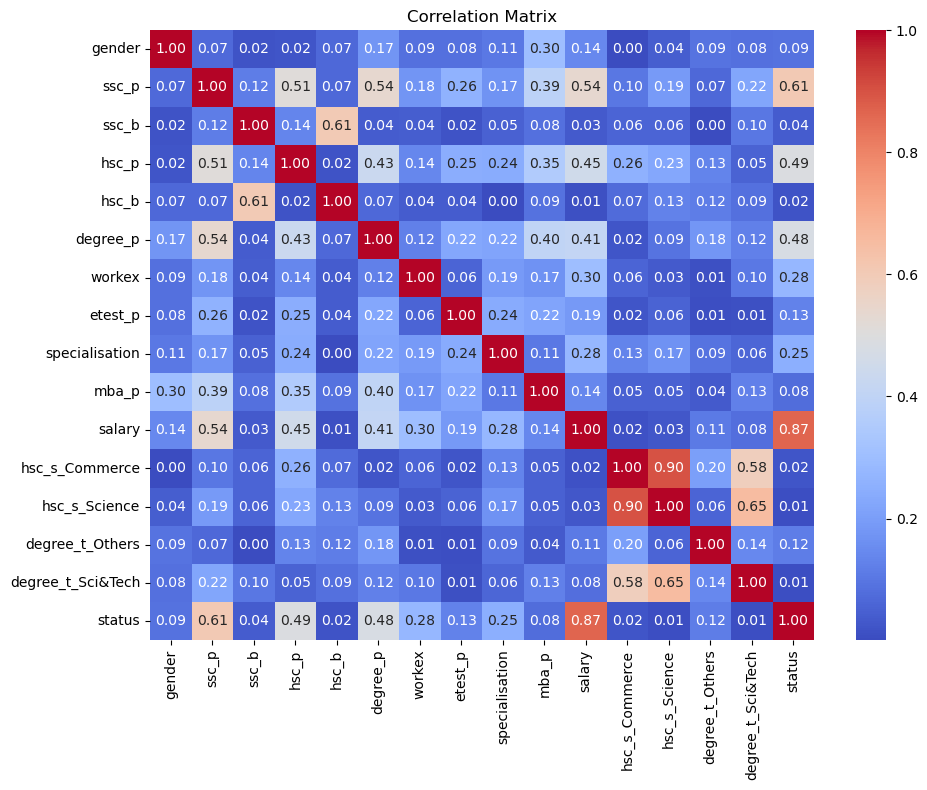

In [28]:
corr_matrix = df_temp.corr().abs() # Calculate absolute values 

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

**Observations from Correlation Matrix**

* There are no **multicollinearity issues**, as no feature pairs have correlation values greater than 0.90. Dummy variables were created using `drop_first=True` to avoid redundant encoding.

* As for correlations with the target (status):
    * `salary` has the highest correlation (0.87), which is expected since salary is only assigned when a student is placed (status = 1). This further confirms what we saw earlier during EDA, since that salary is a direct outcome of placement and should be dropped to avoid data leakage.
    * ssc_p is the strongest usable predictor, with a correlation of 0.61.
    * `hsc_p` and `degree_p` follow with moderate correlations (0.49 and 0.48), suggesting that academic performance across stages influences placement outcomes.
    * Features like `workex` (0.28), `specialisation` (0.25), and `etest_p` (0.13) show weak but still useful correlations.
    * Other features including `gender`, `mba_p`, and the one-hot encoded categorical variables show very weak correlations (mostly < 0.10) and may not have strong individual predictive power.

### Detect outliers


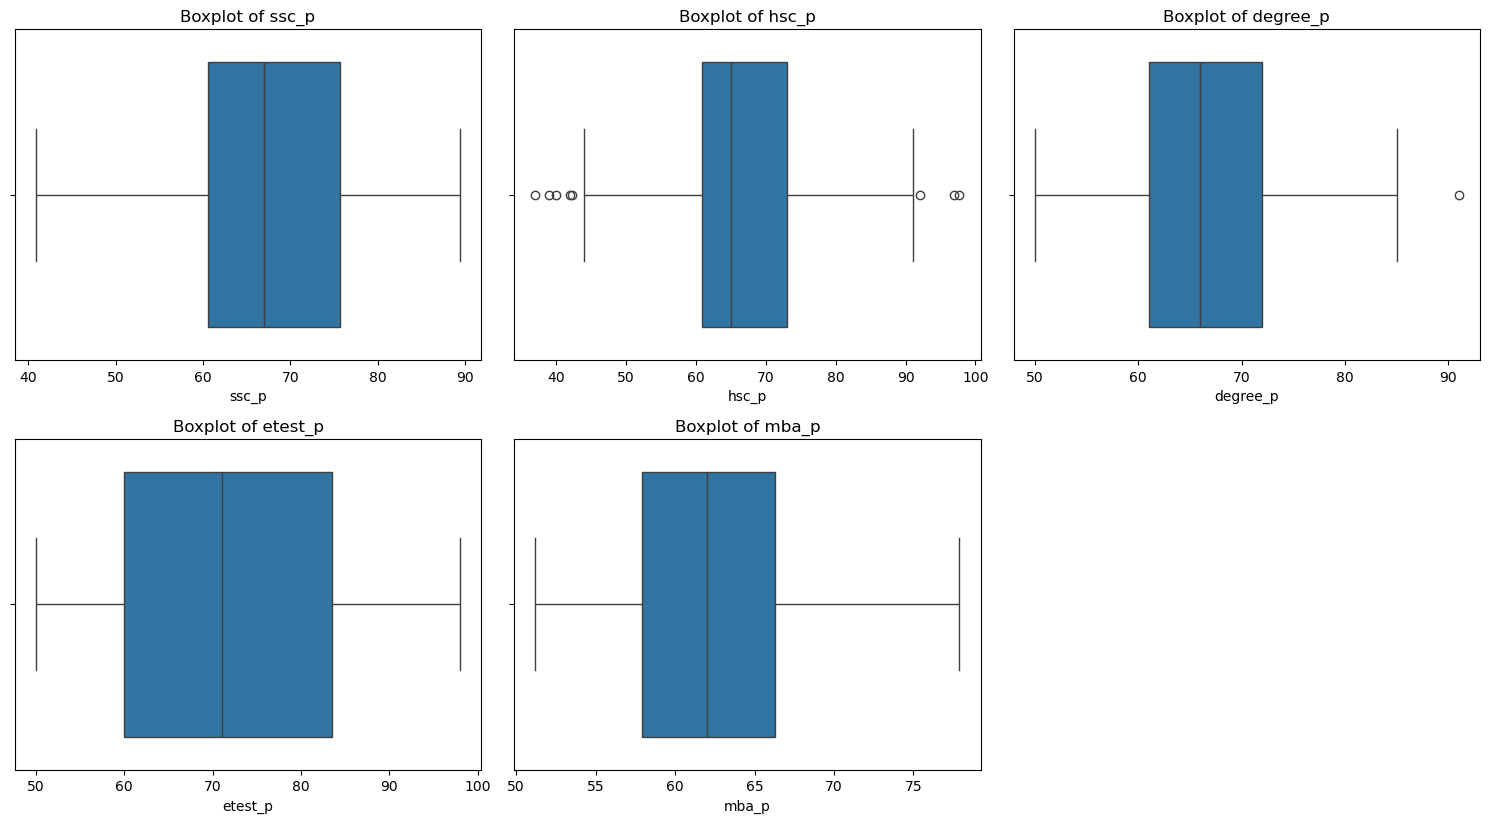

In [29]:
numerical_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_temp, x=col)
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [30]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outlier(s)")
    print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}\n")
    return outliers, lower_bound, upper_bound

In [31]:
for col in ['hsc_p', 'degree_p']:
    detect_outliers_iqr(df_temp, col) # use temp df

hsc_p: 8 outlier(s)
Lower bound: 42.75, Upper bound: 91.15

degree_p: 1 outlier(s)
Lower bound: 44.50, Upper bound: 88.50



**Observations from Outlier Detection**

* `ssc_p`, `etest_p` and `mba_p` show no visible outliers and are evenly distributed within expected ranges.
* `hsc_p` has 8 mild outliers, both both the low and high ends. Since the dataset is small, I won’t drop these rows. Instead, I’ll cap them using the IQR method to avoid distorting the scale during preprocessing.
* `degree_p` has 1 upper outlier above upper bound 88.5%. I’ll cap this too, just to keep things consistent.

### Drop salary column

In [32]:
df_cleaned.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,0,91.00,0,Commerce,58.00,Sci&Tech,0,55.0,0,58.80,1,270000.0
1,0,79.33,1,78.33,0,Science,77.48,Sci&Tech,1,86.5,1,66.28,1,200000.0
2,0,65.00,1,68.00,1,Arts,64.00,Comm&Mgmt,0,75.0,1,57.80,1,250000.0
3,0,56.00,1,52.00,1,Science,52.00,Sci&Tech,0,66.0,0,59.43,0,NaN
4,0,85.80,1,73.60,1,Commerce,73.30,Comm&Mgmt,0,96.8,1,55.50,1,425000.0


In [33]:
df_cleaned.drop(columns='salary', inplace=True)

### Apply capping based on IQR bounds

In [34]:
df_cleaned['hsc_p'] = df_cleaned['hsc_p'].clip(lower=42.75, upper=91.15)
df_cleaned['degree_p'] = df_cleaned['degree_p'].clip(upper=88.5)

print("Verified after capping")
for col in ['hsc_p', 'degree_p']:
    detect_outliers_iqr(df_cleaned, col)

Verified after capping
hsc_p: 0 outlier(s)
Lower bound: 42.75, Upper bound: 91.15

degree_p: 0 outlier(s)
Lower bound: 44.50, Upper bound: 88.50



### Train-Test Split 

In [35]:
X = df_cleaned.drop(columns='status')
y = df_cleaned['status']

RANDOM_STATE=42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=RANDOM_STATE, stratify=y
)
print("Train data shape")
print(X_train.shape, y_train.shape)

print("Test data shape")
print(X_test.shape, y_test.shape)

Train data shape
(150, 12) (150,)
Test data shape
(65, 12) (65,)


In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 93 to 2
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          150 non-null    int64  
 1   ssc_p           150 non-null    float64
 2   ssc_b           150 non-null    int64  
 3   hsc_p           150 non-null    float64
 4   hsc_b           150 non-null    int64  
 5   hsc_s           150 non-null    object 
 6   degree_p        150 non-null    float64
 7   degree_t        150 non-null    object 
 8   workex          150 non-null    int64  
 9   etest_p         150 non-null    float64
 10  specialisation  150 non-null    int64  
 11  mba_p           150 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 15.2+ KB


In [37]:
X_train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
93,0,52.00,1,62.00,1,Commerce,54.00,Comm&Mgmt,0,72.00,0,55.41
105,0,59.00,1,64.00,0,Science,58.00,Sci&Tech,0,85.00,0,55.30
169,0,59.96,0,42.75,0,Science,61.26,Sci&Tech,0,54.48,0,65.48
191,0,67.00,0,61.00,1,Science,72.00,Comm&Mgmt,0,72.00,1,61.01
205,0,61.00,0,62.00,0,Commerce,65.00,Comm&Mgmt,0,62.00,1,56.81


### Get scale_pos_weight for XGBoost

In [38]:
print(y_train.value_counts())

status
1    103
0     47
Name: count, dtype: int64


In [39]:
counter = Counter(y_train)
negative = counter[0]  # 'Not Placed'
positive = counter[1]  # 'Placed'
scale_pos_weight = negative / positive

print(f"scale_pos_weight: {scale_pos_weight:.2f}")

scale_pos_weight: 0.46


In [40]:
SCALE_POS_WEIGHT = 0.46

### Define columns

In [41]:
binary_categorical_cols = ['gender', 'ssc_b', 'hsc_b', 'workex', 'specialisation']
numerical_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
multi_class_cols = ['hsc_s', 'degree_t']

### Define transformers and pipeline

In [42]:
# Numerical: scale
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Multi-class categoricals: one-hot encode
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))  # drop='first' to avoid multicollinearity
])

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, multi_class_cols)
    ],
    remainder='passthrough'  # keep binary columns as they are
)

### Transform X values

In [43]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

## 5. Model Selection

**Approach**

* I selected six models that represent a mix of linear, tree-based, and distance-based classifiers:
    * Logistic Regression (interpretable linear baseline)
    * Decision Tree (simple tree-based model)
    * Random Forest (ensemble method that reduces overfitting)
    * Support Vector Machine (SVM) (effective for small datasets with well-separated classes)
    * K-Nearest Neighbors (KNN) (distance-based model, sensitive to scale)
    * XGBoost (powerful gradient boosting model, often performs well with minimal tuning)

* All models are appropriate for this binary classification task (status: Placed or Not Placed) and can handle mixed input features (numeric + categorical).

In [44]:
models = {
    'Logistic Regression': LogisticRegression(C=1.0, solver='liblinear', max_iter=1000, class_weight='balanced', random_state=RANDOM_STATE),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, min_samples_split=4, class_weight='balanced', random_state=RANDOM_STATE),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=6, class_weight='balanced', random_state=RANDOM_STATE),
    'SVM': SVC(C=1.0, kernel='rbf', probability=True, class_weight='balanced'),  # probability=True needed for ROC, Voting
    'KNN': KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    'XGBoost': XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        scale_pos_weight = SCALE_POS_WEIGHT,
        random_state=RANDOM_STATE
    )
}

## 6. Model Training

**Approach**

* Each model was trained using the transformed training data (X_train_transformed, y_train) from the preprocessing pipeline to ensure consistency and avoid data leakage.

* The models were stored in a dictionary and trained using .fit() for organized and reusable code during evaluation and comparison.

* Hyperparameters were chosen based on commonly recommended values from official documentation. The goal was to balance performance and interpretability without overfitting the small dataset.

In [45]:
trained_models = {}

for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    trained_models[name] = model

## 7. Model Evaluation

### Evaluate on test data

In [46]:
results = []

for name, model in trained_models.items():
    y_pred = model.predict(X_test_transformed)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1Score': f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results).sort_values(by='F1Score', ascending=False)
results_df = results_df.round(2)

display(results_df)

,Model,Accuracy,Precision,Recall,F1Score
2,Random Forest,0.88,0.88,0.96,0.91
0,Logistic Regression,0.82,0.90,0.82,0.86
1,Decision Tree,0.80,0.83,0.89,0.86
4,KNN,0.75,0.78,0.89,0.83
5,XGBoost,0.77,0.84,0.82,0.83
3,SVM,0.77,0.86,0.80,0.83


**Observations from Evaluation Results**

Based on the results, 

* **Random Forest** performed the best overall. It had the highest F1 Score (0.91) and recall (0.96) while maintaining strong precision (0.88). It reliably identified placed students with minimal false positives.

* **Logistic Regression** followed with an F1 Score of 0.86, combining high precision (0.90) with decent recall (0.82). It’s a stable and interpretable choice.

* **Decision Tree**  also achieved an F1 Score of 0.86, slightly lower accuracy (0.80) than Logistic Regression. It had good recall (0.89) but lower precision (0.83), indicating possible overfitting or noise sensitivity.

* **XGBoost**, **SVM** and **KNN** all tied with F1 Scores of 0.83, though their internal balances varied:

    * XGBoost leaned slightly toward precision (0.84) over recall (0.82).

    * SVM reversed that pattern with precision 0.86 but lower recall 0.80.

    * KNN favored recall (0.89) but lagged on precision (0.78), suggesting higher false positives.

### Plot Confusion Matrices

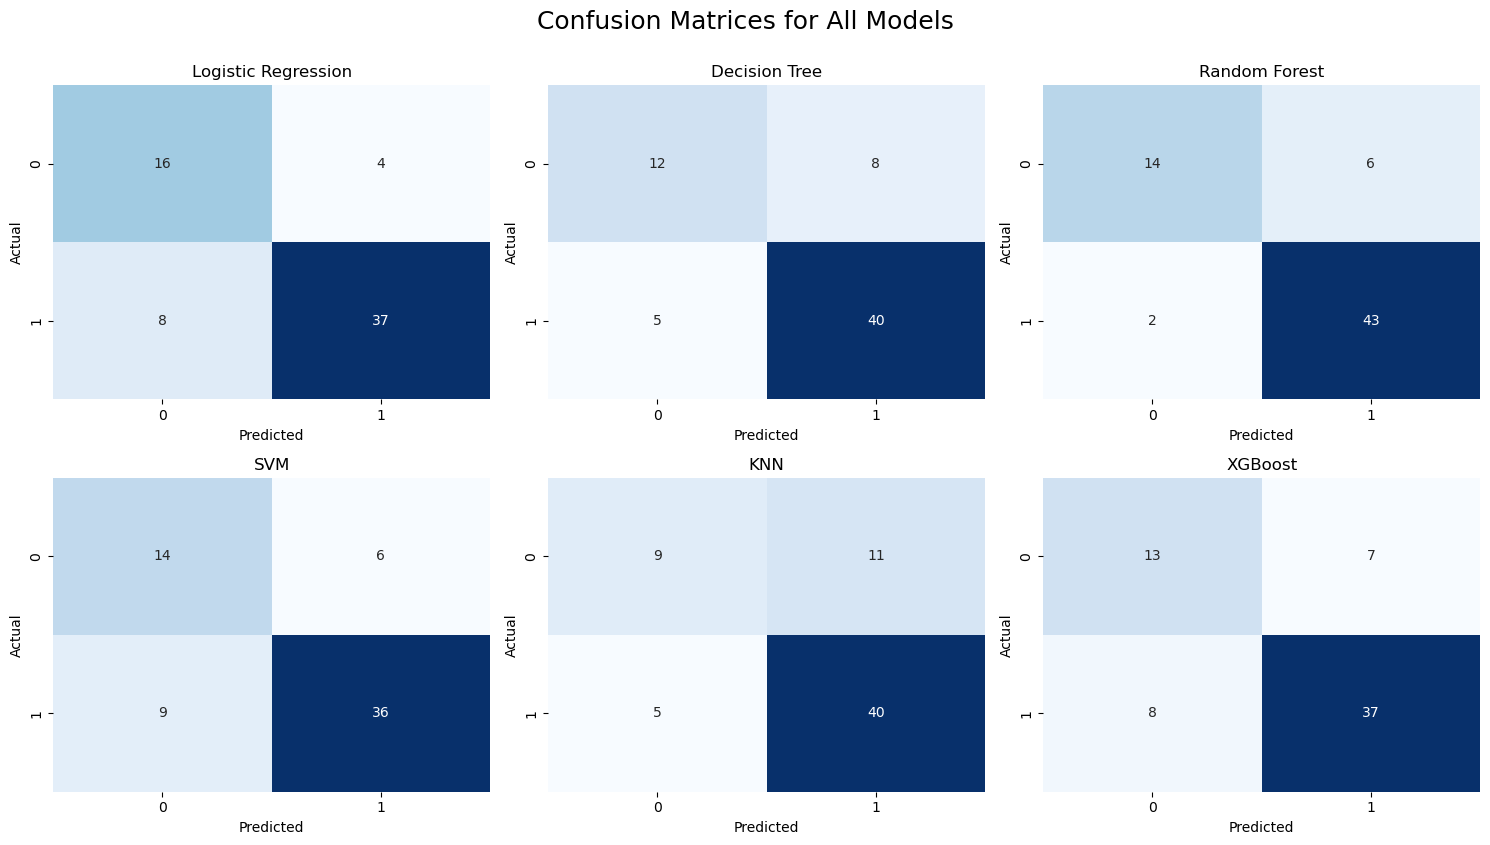

In [47]:
n_models = len(trained_models)
cols = 3
rows = math.ceil(n_models / cols)

plt.figure(figsize=(cols * 5, rows * 4))

for i, (name, model) in enumerate(trained_models.items(), start=1):
    y_pred = model.predict(X_test_transformed)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(rows, cols, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.suptitle("Confusion Matrices for All Models", fontsize=18, y=1.05)
plt.show()

**Observations from Confusion Matrices**

Based on the confusion matrices: 

* **Random Forest** performed the best overall. It correctly classified 43 out of 45 placed students (only 2 false negatives) and 14 out of 20 not-placed students (6 false positives), showing strong class-wise balance.

* **Decision Tree** also predicted 40 placed students correctly (5 false negatives), but had a higher number of false positives (8), classifying more not-placed students as placed.

* **Logistic Regression** predicted 37 placed students correctly, but missed 8 placed students (8 false negatives) and incorrectly classified 4 not-placed students (false positives).

* **XGBoost** also predicted 37 placed students correctly (8 false negatives) and had 7 false positives, leading to overall decent but less consistent predictions than RF or DT.

* **SVM** predicted 36 placed students correctly (9 false negatives) with 6 false positives.

* **KNN** had the weakest result. It correctly classified 40 placed students, but had 11 false positives and 9 false negatives.

### Print Classification Reports

In [48]:
for name, model in trained_models.items():
    y_pred = model.predict(X_test_transformed)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print()

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        20
           1       0.90      0.82      0.86        45

    accuracy                           0.82        65
   macro avg       0.78      0.81      0.79        65
weighted avg       0.83      0.82      0.82        65


Model: Decision Tree
              precision    recall  f1-score   support

           0       0.71      0.60      0.65        20
           1       0.83      0.89      0.86        45

    accuracy                           0.80        65
   macro avg       0.77      0.74      0.75        65
weighted avg       0.79      0.80      0.80        65


Model: Random Forest
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        20
           1       0.88      0.96      0.91        45

    accuracy                           0.88        65
   macro avg       0.88      0.83      0.85        65
wei

**Observations from Classification Reports**

I used the classification reports to double-check each model’s precision, recall, and F1-scores for both placed and not placed students.

* **Random Forest** came out strongest. It had 0.96 recall for placed students and 0.88 precision for not placed ones. Its overall F1 score (0.91) shows it handled both classes well.

* **Logistic Regression**had 0.82 recall for placed students and 0.67 precision for not placed students. Its F1 score for not placed students was 0.73, showing balanced performance.

* **XGBoost** was similar to Logistic Regression. It had 0.82 recall and 0.84 precision for placed students, while for not placed students it got 0.65 recall and 0.62 precision, leading to a lower macro average.

* **Decision Tree** leaned slightly toward placed predictions. It had 0.89 recall for placed students but only 0.60 recall for not placed, which pulled down its F1 score for class 0 to 0.65.

* **SVM** had decent balance. It showed 0.80 recall for placed students and 0.70 recall for not placed. Still, precision dropped a bit for not placed, keeping the F1 moderate at 0.65 for that class.

* **KNN** had the weakest result. It only had 0.45 recall for not placed students and 0.53 F1 score for that class. While recall for placed students was decent (0.89), the imbalance across classes made it the least reliable overall.

### Plot ROC Curves

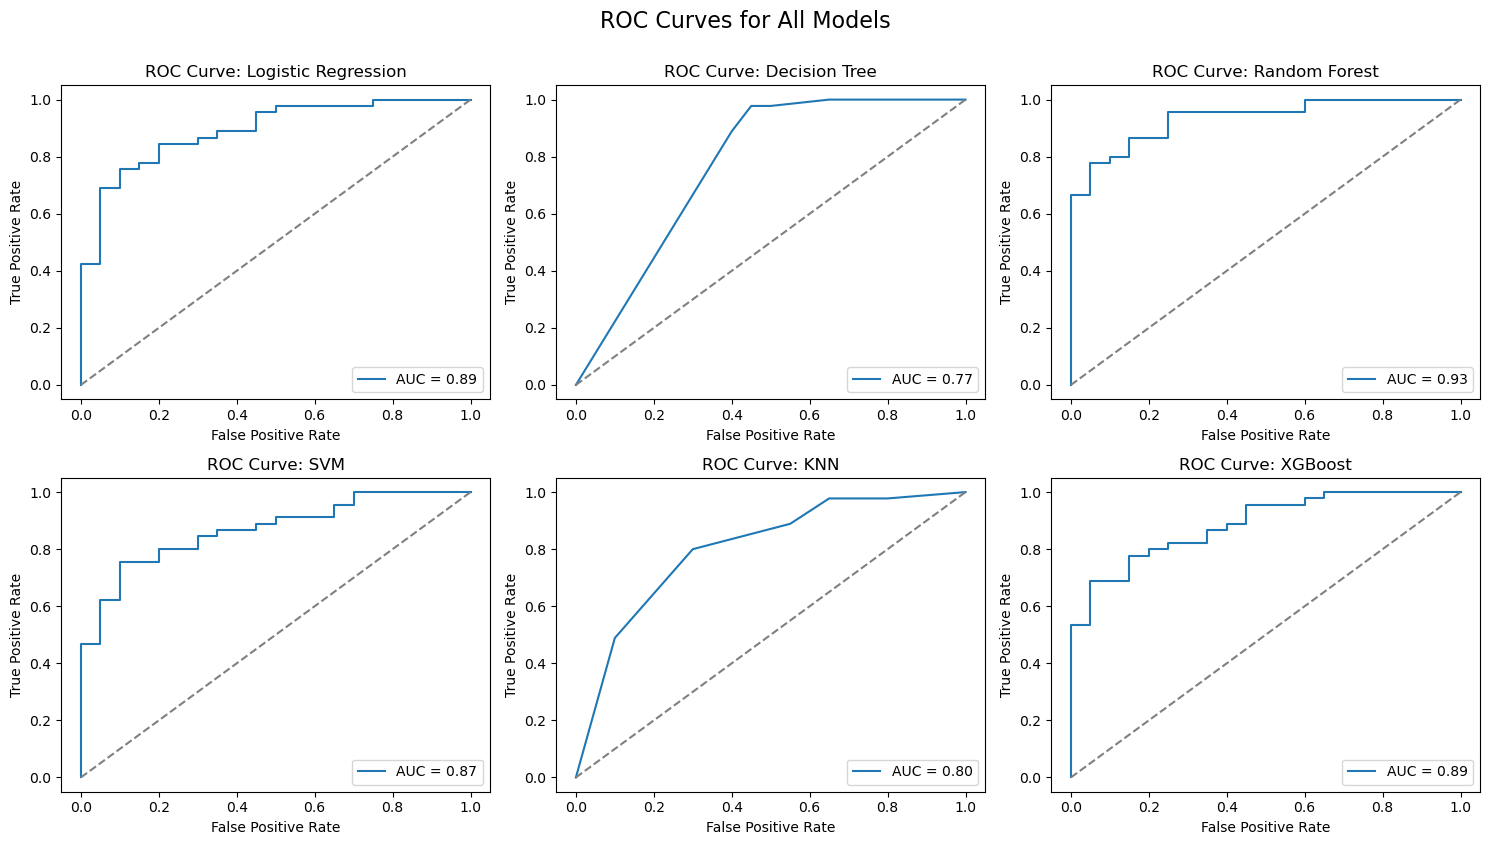

In [49]:
n_models = len(trained_models)
cols = 3
rows = math.ceil(n_models / cols)

plt.figure(figsize=(cols * 5, rows * 4))

for i, (name, model) in enumerate(trained_models.items(), start=1):
    plt.subplot(rows, cols, i)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_transformed)[:, 1]
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test_transformed)
    else:
        plt.title(f"{name}\n(no ROC)")
        continue

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve: {name}")
    plt.legend(loc="lower right")

plt.tight_layout()
plt.suptitle("ROC Curves for All Models", fontsize=16, y=1.05)
plt.show()

**Observations from ROC Curves**

I used the ROC curves to understand how well each model separates between placed and not placed students.

* **Random Forest** had the highest AUC (0.93). The curve rises quickly and stays close to the top-left, showing strong separation and confirming its earlier performance on precision and recall.

* **Logistic Regression** followed with an AUC of 0.89. The steps are visible but it still shows consistent and confident separation between classes.

* **XGBoost** also had an AUC of 0.89. Its curve is smooth and reflects solid classification ability, consistent with its balanced F1 score.

* **SVM** came next with an AUC of 0.87. While not the highest, it still shows reliable class distinction.

* **KNN** had an AUC of 0.80. The curve is a bit jagged, and shows some weakness in distinguishing the classes, especially early on the x-axis.

* **Decision Tree** had the lowest AUC at 0.77. Its curve was much closer to the diagonal, suggesting poor confidence in its predictions and weaker overall separation.

### Plot Precision-Recall Curves

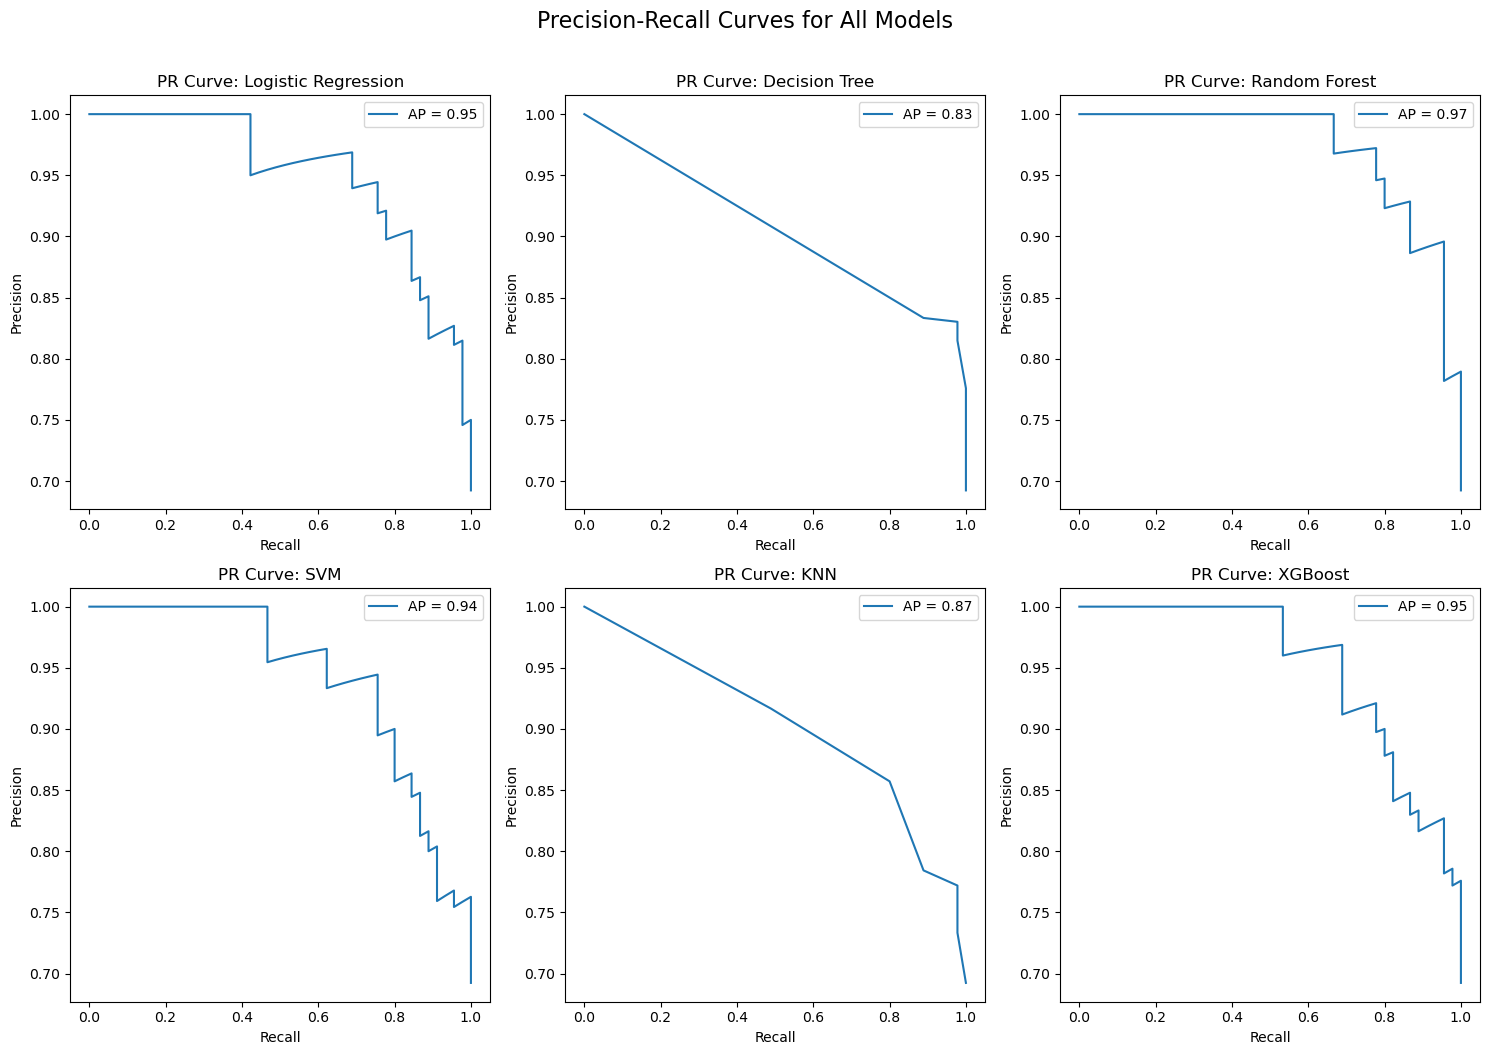

In [50]:
plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(trained_models.items(), start=1):
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_transformed)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test_transformed)
    else:
        continue

    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    avg_precision = average_precision_score(y_test, y_scores)

    plt.subplot(2, 3, i)
    plt.plot(recall, precision, label=f"AP = {avg_precision:.2f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"PR Curve: {name}")
    plt.legend()

plt.tight_layout()
plt.suptitle("Precision-Recall Curves for All Models", fontsize=16, y=1.05)
plt.show()

**Observations from Precision-Recall Curves**

I used PR curves to evaluate how each model performs on the positive class, which is the placed students. This helps highlight how well a model balances precision as it tries to increase recall.

* **Random Forest** stood out with the highest average precision of 0.97. It maintained high precision even as recall increased, which confirms its earlier dominance in classification metrics.

* **Logistic Regression** and **XGBoost** both followed with an average precision of 0.95. Their curves remained strong across the recall range, showing reliable performance and solid confidence.

* **SVM** came next at 0.94. It was fairly stable but showed more fluctuation at higher recall levels compared to the top models.

* **KNN** scored 0.87. Its curve started well but dropped steadily, indicating that precision declines as recall increases.

* **Decision Tree** had the lowest average precision at 0.83. Its PR curve declined more sharply, reflecting its weaker balance between precision and recall.

In [51]:
# Convert categorical columns into dummy/indicator variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test  = pd.get_dummies(X_test, drop_first=True)

# Align train/test to have the same columns
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

In [52]:
# --- 1. Train & Evaluate all models ---
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results).set_index("Model")
display(results_df)

,Accuracy,Precision,Recall,F1-Score
Model,,,,
Logistic Regression,0.753846,0.822222,0.822222,0.822222
Decision Tree,0.784615,0.829787,0.866667,0.847826
Random Forest,0.846154,0.843137,0.955556,0.895833
SVM,0.846154,0.872340,0.911111,0.891304
KNN,0.830769,0.814815,0.977778,0.888889
XGBoost,0.784615,0.829787,0.866667,0.847826


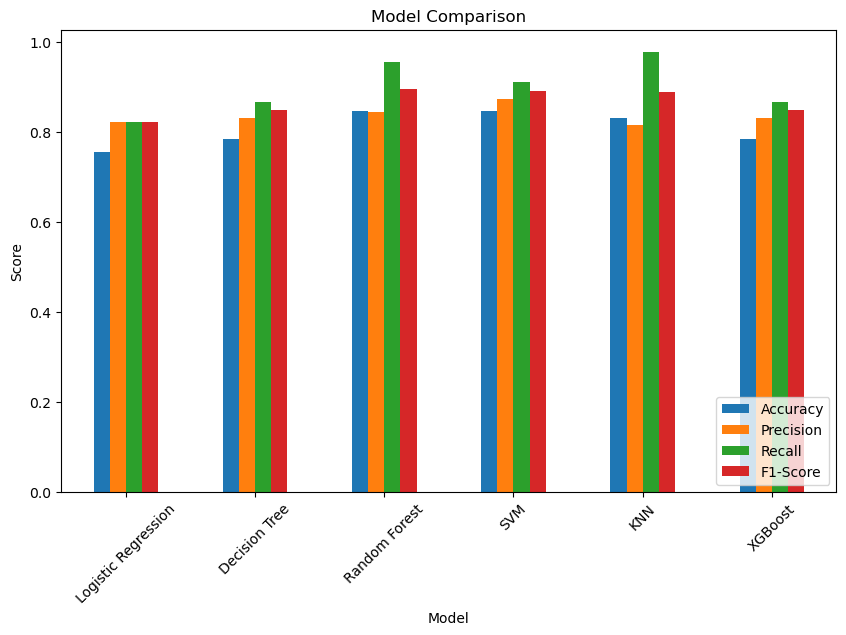

In [53]:
# --- 2. Bar Graph Comparison ---
results_df.plot(kind="bar", figsize=(10,6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()

In [54]:
# Find the best model by F1-Score
best_model_name = results_df["F1-Score"].idxmax()
print("Best Model is:", best_model_name)


Best Model is: Random Forest


In [55]:
import pickle

# --- 1. Find the best model ---
best_model_name = results_df["F1-Score"].idxmax()
best_model = models[best_model_name]

print(f"🔥 Best Model is: {best_model_name}")

# --- 2. Save the best model ---
with open(f"best_model_{best_model_name}.pkl", "wb") as f:
    pickle.dump(best_model, f)

# --- 3. Save training feature columns (after encoding) ---
with open("model_columns.pkl", "wb") as f:
    pickle.dump(list(X_train.columns), f)

print(f"Saved model as best_model_{best_model_name}.pkl")
print("Saved feature columns as model_columns.pkl")


🔥 Best Model is: Random Forest
Saved model as best_model_Random Forest.pkl
Saved feature columns as model_columns.pkl
